### Getting imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sys
sys.path.append('../')

from utils import read_list, normal_distribution, get_scatter_plot, normalize, normed_dists_to_sims

## Retrieve the list of diversity and novelty from the text files

In [6]:
jac_real_diversities = read_list('jaccard_diversities_real.txt')
jac_real_novelties = read_list('jaccard_novelties_real.txt')

jac_fake_diversities = read_list('jaccard_diversities_fake3.txt')
jac_fake_novelties = read_list('jaccard_novelties_fake3.txt')

print(len(jac_real_diversities), len(jac_real_novelties))

10785 10785


### Scatter plot of novelties vs diversities

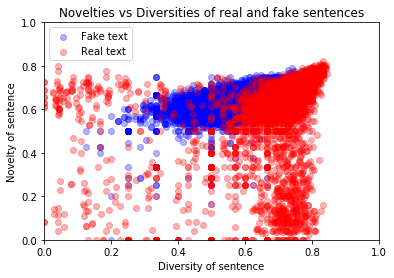

In [7]:
get_scatter_plot(jac_fake_diversities, jac_fake_novelties, jac_real_diversities, jac_real_novelties)

## Real text: Distribution of novelties and diversities

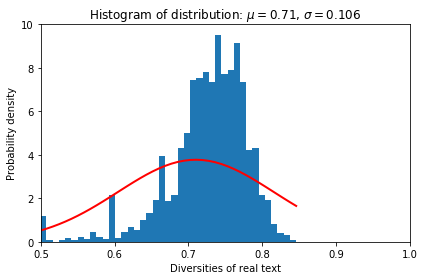

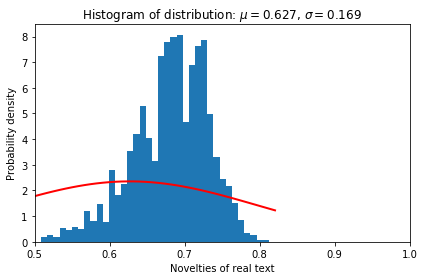

In [9]:
normal_distribution(jac_real_diversities, 'Diversities of real text')
normal_distribution(jac_real_novelties, 'Novelties of real text')

## Fake text: Distribution of novelties and diversities

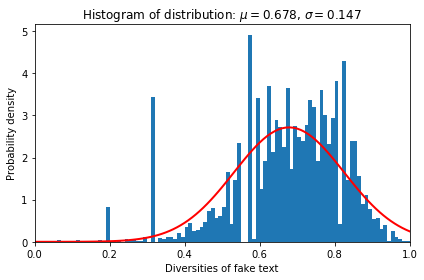

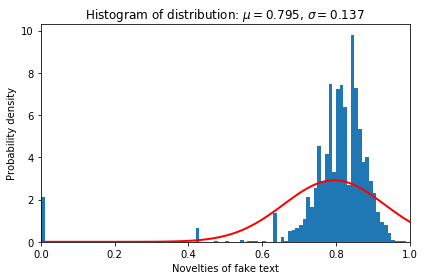

In [16]:
normal_distribution(jac_fake_diversities, 'Diversities of fake text')
normal_distribution(jac_fake_novelties, 'Novelties of fake text')

In [17]:
# Normalisation

In [14]:
import sys
sys.path.insert(0, '../')

from utils import read_list, normal_distribution, get_scatter_plot, normalize, inverse_distances, normed_dists_to_sims

# Transform distances to similarities
jac_real_diversities = normed_dists_to_sims(normalize(jac_real_diversities))
jac_real_novelties = normed_dists_to_sims(normalize(jac_real_novelties))
jac_fake_diversities = normed_dists_to_sims(normalize(jac_fake_diversities))
jac_fake_novelties = normed_dists_to_sims(normalize(jac_fake_novelties))

assert(len(jac_fake_diversities) == len(jac_fake_novelties))
assert(len(jac_real_diversities) == len(jac_real_novelties))

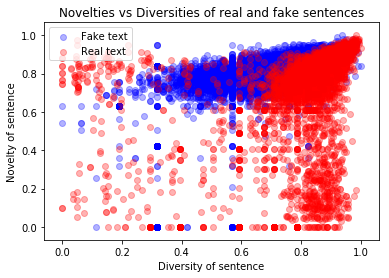

In [15]:
get_scatter_plot(jac_fake_diversities, jac_fake_novelties, jac_real_diversities, jac_real_novelties)